In [1]:
#@title imports 
import os
import pickle
from typing import Set
# from jedi import settings
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.sparse import data 
import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap.plot as uplot
from sknetwork.clustering import Louvain,get_modularity
from sknetwork.data import karate_club
import sys 
sys.path.append('C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts')
from sknetwork.clustering import Louvain,get_modularity
from sknetwork.data import karate_club
from UMAP import *
pd.options.mode.use_inf_as_na = True

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarni

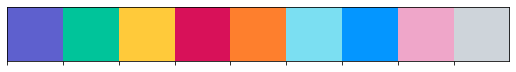

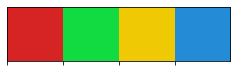

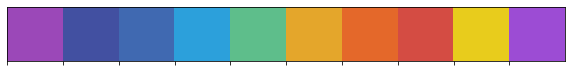

In [2]:

CUSTOM_PAL_SORT_3 = ['#5e60ce','#00c49a','#ffca3a','#D81159','#fe7f2d','#7bdff2','#0496ff','#efa6c9','#ced4da']
GMM_PAL = ['#d62424','#12db41','#f0c905','#248cd6']

# In RGB form
coherence_colors = [[0.609, 0.283, 0.724],
                    [0.259,	0.314, 0.635],
                    [0.251,	0.412, 0.698],
                    [0.176,	0.631, 0.859],
                    [0.369,	0.749, 0.549],
                    [0.898,	0.654, 0.169],
                    [0.898,	0.41 , 0.165],
                    [0.834,	0.3 , 0.265],
                    [0.912,	0.8 , 0.112],
                    [0.612,	0.3 , 0.834]]
sns.palplot(CUSTOM_PAL_SORT_3)
sns.palplot(GMM_PAL)
sns.palplot(coherence_colors)

In [3]:
def plot_UMAP_clusters_single(data_inh, neighbours, distance, res_louvain, random_state,norm=True, c_list=None ,save=False):
    """plots UMAP for excitatory and inhibitory cells 

    Args:
        data_inh (ndarray): cell X feature matrix for inhibitory cells
        data_exc (ndarray): cell X feature matrix for excitatory cells
        c_exc (array): _description_
        c_inh (array): _description_
        neighbours (int): number of neares neighbours
        distance (float): minimum distance between points
    """
    data_umap_scaler = StandardScaler()
    data_umap = data_umap_scaler.fit_transform(data_inh)
    if norm:
        data_umap = normalize(data_umap)
    
    neighbours = neighbours
    dist = distance
    reducer = umap.UMAP(n_neighbors=neighbours,min_dist=dist,random_state=random_state)
    mapper = reducer.fit(data_umap)
    
    fig = plt.figure(figsize=[8,8])
    ax12d = fig.add_subplot(1,1,1)
    
    louvain = Louvain(resolution=res_louvain,random_state=random_state)
    adjacency = mapper.graph_
    labels_exc = louvain.fit_predict(adjacency)

    print(len(set(labels_exc)))
    clusterable_embedding2d_exc = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_umap)



    df_2d_exc = {'UMAP1':clusterable_embedding2d_exc[:, 0],
             'UMAP2':clusterable_embedding2d_exc[:, 1],
             'class':labels_exc}

    ax12d.set_xticks([])
    ax12d.set_yticks([])

    sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',palette=c_list[:len(set(labels_exc))],ax=ax12d)
    # sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',ax=ax12d)

    # ax12d.set_title('UMAP clusters for excitatory neurons 2D')
    ax12d.legend()
    if save:
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/exc_umap_cluster.png',dpi=200)
    
    plt.show()

    return labels_exc,mapper,reducer

In [4]:
pal = ["#00202e","#003f5c","#2c4875","#8a508f","#bc5090","#ff6361","#ff8531","#ffa600","#ffd380"]

In [5]:

features_ext = ['current_at_first_spike','ap_count','fr','inst_fr','time_to_first_spike','mean_isi','median_isi','max_isi',
'min_isi','first_thr','mean_thr','median_thr','min_thr','max_thr','mean_width','median_width','max_width',
'min_width','mean_amplitude','median_amplitude','min_amplitude','max_amplitude','exp_name','cond','trialnr']
features_ext_sub = ['current_at_first_spike','ap_count','fr','inst_fr','time_to_first_spike','mean_isi','median_isi','max_isi',
'min_isi','first_thr','mean_thr','median_thr','min_thr','max_thr','mean_width','median_width','max_width',
'min_width','mean_amplitude','median_amplitude','min_amplitude','max_amplitude']
data_all_conds = pickle.load(open('G:/My Drive/Cluster Feature files/Niccolo_FN.pkl','rb'))
exc = data_all_conds['exc']
inh = data_all_conds['inh']
def lower(data):
    return data.lower()
exc_df_all = pd.DataFrame(exc,columns = features_ext)
inh_df_all = pd.DataFrame(inh,columns = features_ext)
exc_inh_df = pd.concat([exc_df_all,inh_df_all])
exc_inh_df.index = np.arange(len(exc_inh_df))
inds =set(np.where(exc_inh_df.isna())[0])

exc_inh_df['ei_labels'] = np.concatenate((np.repeat(0,len(exc_df_all)),np.repeat(1,len(inh_df_all))))
exc_inh_df = exc_inh_df.drop(inds,axis=0)

date = [i.split('_')[1] for i in  exc_inh_df.exp_name]
name = [i.split('_')[0] for i in  exc_inh_df.exp_name]
exp_number = [i.split('_')[-1] for i in  exc_inh_df.exp_name]
exc_inh_df['date'] = date
exc_inh_df['name'] = name
exc_inh_df['exp_number'] = exp_number

exc_inh_df.cond = exc_inh_df.cond.apply(lower)    
exc_inh_df_acsf = exc_inh_df[exc_inh_df.cond=='acsf'] 
NC_data  = exc_inh_df_acsf[exc_inh_df_acsf.name=='NC']


In [6]:
def return_name_string_obj_NC(data):
  broken_str = data.split('_')
  if 'NC' == broken_str[2]:
    name = broken_str[2]
    date = broken_str[3]
    return name+'_'+date
  else:
    name = broken_str[3]
    date = broken_str[2]
    return name+'_'+date

def modify_names(file_name):
  str_temp = file_name
  all_parts = str_temp.split('_')
  print(all_parts)
  name = all_parts[0]
  if 'Payam' == name:
    name = name.lower()
  broken = all_parts[1].split('-')
  date = broken[:3]
  date = date[0]+date[1]+date[2]
  exp = broken[3]
  return name+'_'+date+'_'+exp

def return_name_date_exp_fn(string):

  if 'NC' in string:
    string_broken = string.split('_')
    name = string_broken[0]
    date = string_broken[1]
    exp = string_broken[-1]
    year = date[:2]
    month = date[2:4]

    if month[0] =='0':
      month = month[1]
    day = date[4:]
    if day[0] =='0':
      day = day[1]
    date = day+month+year  
    return name+'_'+date+'_'+exp 
  elif 'xuan' in string:
    broken_str = string.split('_')
    name = broken_str[0]
    date = broken_str[1].replace('-','')
    exp =  broken_str[2]
    return name+'_'+date+'_'+exp
  elif 'asli' in string:
    broken_str = string.split('_')
    name = broken_str[0]
    date = broken_str[1].replace('-','')
    exp =  broken_str[2]
    return name+'_'+date+'_'+exp    
  elif 'Payam' in string:
    broken_str = string.split('_')
    name = broken_str[0].lower()
    date = broken_str[1].split('-')
    exp =  broken_str[2]
    day = date[0]
    month = date[1]
    year = date[2]
    if day[0] =='0':
      day=day[1]
    date = day+month+year  
    return name+'_'+date+'_'+exp

all_cc_names_and_dates = [return_name_date_exp_fn(i) for i in exc_inh_df_acsf.exp_name]

# modify_names(exc_inh_df_acsf.exp_name[0])  

In [7]:
exc_inh_df_acsf.exp_name = exc_inh_df_acsf.exp_name.apply(return_name_date_exp_fn)

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Plot UMAP for all CC files shared on Monday (07/09/23)

5


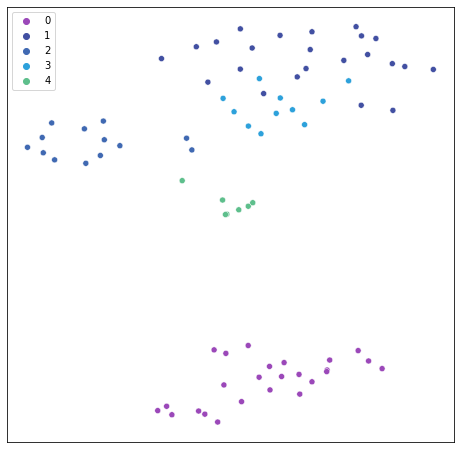

5


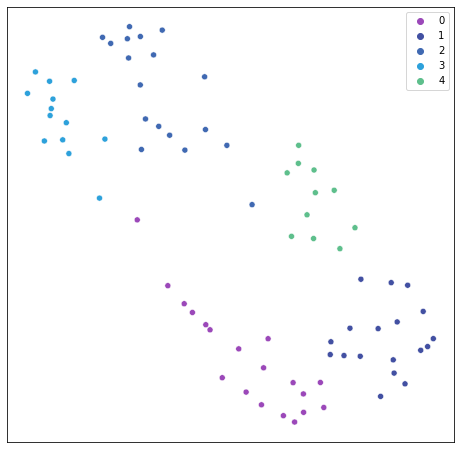

In [42]:
data = pd.read_csv('D:/Cluster Feature files/CC_NC_DB.csv')
files_ID = pd.read_csv('D:/lists/NC_DB_for_cluster.csv')

NC_CC_DB = data[data.name=='NC']
NC_CC_DB = NC_CC_DB[NC_CC_DB.exp_number.isin(set(files_ID.exp_number))] 
NC_CC_DB_1 =  NC_CC_DB[NC_CC_DB.trialnr==1]

NC_FN_DB = NC_data[NC_data.exp_name.isin(set(files_ID.Fn_files))]

NC_FN_DB_1 = NC_FN_DB[NC_FN_DB.trialnr==1]
NC_FN_DB_1 = NC_FN_DB_1.drop_duplicates('exp_name')

feats_CC = NC_CC_DB.columns

feats_FN = NC_FN_DB.columns

labels_cc,mapper,reducer = plot_UMAP_clusters_single(NC_CC_DB_1[feats_CC[:-6]],
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list = coherence_colors
                          )

labels_fn,mapper,reducer = plot_UMAP_clusters_single(NC_FN_DB_1[feats_FN[:-7]],
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list = coherence_colors
                          )


In [61]:
NC_CC_DB_1['CC_labels'] = labels_cc
NC_FN_DB_1['FN_labels'] = labels_fn
NC_FN_DB_1

<ipython-input-61-e2e5933a8e35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC_CC_DB_1['CC_labels'] = labels_cc


,current_at_first_spike,ap_count,fr,inst_fr,time_to_first_spike,mean_isi,median_isi,max_isi,min_isi,first_thr,...,min_amplitude,max_amplitude,exp_name,cond,trialnr,ei_labels,date,name,exp_number,FN_labels
0,8.200875,291,0.887500,0.046849,2703.35,1224.064483,274.250,15331.60,6.45,-44.218749,...,51.062500,132.343750,NC_170711_aCSF_D1ago_E1,acsf,1,0,170711,NC,E1,2
4,196.910798,127,0.383333,0.005651,8316.55,2772.755159,1818.250,15337.05,15.15,-36.125001,...,56.250000,103.874996,NC_170712_aCSF_D1ago_E1,acsf,1,0,170712,NC,E1,1
5,136.330819,171,1.870000,0.032204,2101.80,2103.784412,1570.900,16483.80,4.10,-27.500000,...,4.750000,115.999997,NC_170712_aCSF_D1ago_E2,acsf,1,0,170712,NC,E2,2
8,159.948951,208,0.623333,0.005363,2114.20,1717.713285,1007.400,15333.75,11.20,-38.249999,...,24.406250,90.500001,NC_170713_aCSF_DopD2D1_E3,acsf,1,0,170713,NC,E3,0
9,17.677462,1381,4.370000,0.025703,183.20,260.546667,139.400,2634.55,6.60,-39.781250,...,8.281250,100.812502,NC_170713_aCSF_DopD2D1_E4,acsf,1,0,170713,NC,E4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0.452788,1556,4.361111,0.027709,174.85,231.392026,102.800,2349.75,5.60,-33.281252,...,60.156249,95.624998,NC_170815_aCSF_D1ago_E1,acsf,1,1,170815,NC,E1,5
654,176.392417,2258,6.272222,0.028734,173.75,159.422153,70.850,1645.15,6.10,-42.218748,...,41.999999,105.624998,NC_170815_aCSF_D1ago_E3,acsf,1,1,170815,NC,E3,4
664,151.247567,1260,3.500000,0.021509,174.35,285.790667,148.250,2502.45,5.15,-41.749999,...,67.343751,100.000001,NC_170914_aCSF_D1ago_E1,acsf,1,1,170914,NC,E1,3
692,156.268867,1942,5.877778,0.024512,173.60,185.372257,98.150,1644.75,5.95,-29.531250,...,37.968749,86.906251,NC_171211_aCSF_E1,acsf,1,1,171211,NC,E1,5


In [62]:
merged=pd.merge(files_ID, NC_CC_DB_1[['exp_number','CC_labels']], left_on='exp_number', right_on='exp_number', how='left',sort=True)
merged = pd.merge(merged, NC_FN_DB_1[['exp_name','FN_labels']], left_on='Fn_files', right_on='exp_name', how='left',sort=True)
CC_FN_corresp = {}
for i in set(NC_CC_DB_1.CC_labels):
    temp = merged[merged.FN_labels==i]
    CC_FN_corresp['FN_'+str(i)] = np.unique(temp['CC_labels'],return_counts=True)
CC_FN_corresp

{'FN_0': (array([1., 2., 3., 5.]), array([6, 6, 2, 4], dtype=int64)),
 'FN_1': (array([0., 1., 2., 3., 4., 5.]),
  array([1, 2, 7, 5, 1, 1], dtype=int64)),
 'FN_2': (array([0., 1., 2., 3.]), array([1, 5, 3, 5], dtype=int64)),
 'FN_3': (array([0., 4.]), array([10,  1], dtype=int64)),
 'FN_4': (array([ 0.,  1.,  5., nan]), array([4, 2, 1, 3], dtype=int64)),
 'FN_5': (array([0., 1., 4.]), array([2, 1, 6], dtype=int64))}

In [11]:
cells,features = waves_inh_FN.shape
pca = PCA(n_components=features)
scaler = StandardScaler()
data_all = waves_inh_FN
data_all = scaler.fit_transform(data_all)
data_all = normalize(data_all)
pca.fit(data_all)
eigenvalues = pca.explained_variance_
sum(eigenvalues)**2/sum(eigenvalues**2)

NameError: name 'waves_inh_FN' is not defined

Manifold alignment between all FN and CC cells (new data)

use random seed: 42
Shape of Raw data
Dataset 0: (79, 22)
Dataset 1: (79, 24)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[100/500] err:0.7979 alpha:0.8147
epoch:[200/500] err:0.8144 alpha:0.8390
epoch:[300/500] err:0.8188 alpha:0.8526
epoch:[400/500] err:0.8181 alpha:0.8602
epoch:[500/500] err:0.8148 alpha:0.8659
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[10/100]: loss:1.151733, align_loss:0.097437
epoch:[20/100]: loss:0.847603, align_loss:0.098548
epoch:[30/100]: loss:0.753850, align_loss:0.091344
epoch:[40/100]: loss:0.813310, align_loss:0.093428
epoch:[50/100]: loss:0.698903, align_loss:0.094767
epoch:[60/100]: loss:0.742357, align_loss:0.095624
epoch:[70/100]: loss:0.619969, align_loss:0.101774
epoch:[80/100]: loss:0.717734, align_loss:0.100696
epoch:[90/100]: loss:0.707013, align_loss:0.092322
epoch:[100/100]: loss:0.712666, align_loss:0.094416
Done
------------------

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\unioncom\visualization.py:127: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(embedding[i][:,0], embedding[i][:,1], c=color[i], s=5., alpha=0.8)


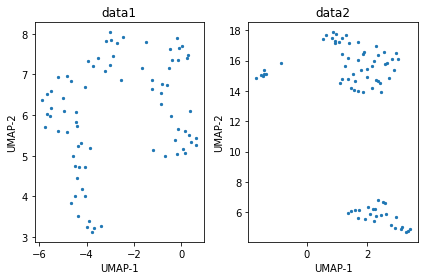

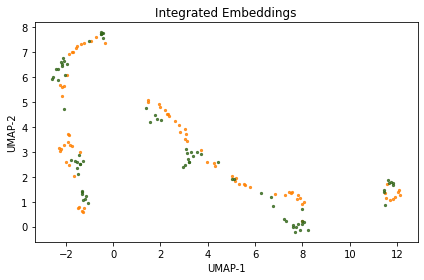

In [56]:

from unioncom import UnionCom
# import numpy as np
data = pd.read_csv('D:/Cluster Feature files/CC_NC_DB.csv')
files_ID = pd.read_csv('D:/lists/NC_DB_for_cluster.csv')

NC_CC_DB = data[data.name=='NC']
NC_CC_DB = NC_CC_DB[NC_CC_DB.exp_number.isin(set(files_ID.exp_number))] 
NC_CC_DB_1 =  NC_CC_DB[NC_CC_DB.trialnr==1]

NC_FN_DB = NC_data[NC_data.exp_name.isin(set(files_ID.Fn_files))]

NC_FN_DB_1 = NC_FN_DB[NC_FN_DB.trialnr==1]
NC_FN_DB_1 = NC_FN_DB_1.drop_duplicates('exp_name')

# feats_CC = ['current_first_spike', 'ap_count', 'abs_firing_rate',
#        'inst_firing_rate', 'time_to_first_spike', 'mean_isi', 'max_isi',
#        'min_isi', 'median_isi', 'first_thrs', 'mean_thrs', 'max_thrs',
#        'min_thrs', 'median_thrs', 'mean_hwidths',
#        'median_hwidths', 'max_hwidths', 'min_hwidths', 'mean_amp',
#        'median_amp', 'max_amp', 'min_amp']

feats_CC = NC_CC_DB.columns
feats_FN = NC_FN_DB.columns

data_scaler = StandardScaler()
NC_FN_1 = NC_FN_DB_1
NC_CC_1 = NC_CC_DB_1

data1= NC_FN_1[NC_FN_1.columns[:-7]]
data1 = data_scaler.fit_transform(data1)
data1 = normalize(data1)
data2 = NC_CC_1[feats_CC[:-5]]
data2 = data_scaler.fit_transform(data2)
data2 = normalize(data2)
uc = UnionCom.UnionCom(project_mode='tsne',output_dim=10,manual_seed=42,epoch_pd=500,epoch_DNN=100)
integrated_data = uc.fit_transform(dataset=[data1,data2])

# uc.Visualize([data1,data2], integrated_data, mode='UMAP') # without datatype
uc.Visualize([data1,data2], integrated_data,mode='UMAP') # without datatype


{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5}


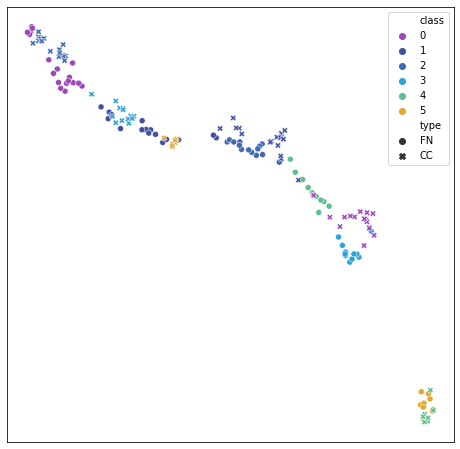

In [63]:

data_umapFN = integrated_data[0]
data_umapCC = integrated_data[1]
data_umap_combined = np.vstack([integrated_data[0],integrated_data[1]])


fig = plt.figure(figsize=[8,8])
ax12d = fig.add_subplot(1,1,1)
random_state =42
neighbours = 20
dist = .1
res_louvain = 1.

reducer = umap.UMAP(n_neighbors=neighbours,min_dist=dist,random_state=random_state)

mapperFN = reducer.fit(data_umapFN)
louvain = Louvain(resolution=res_louvain,random_state=random_state)
adjacency = mapperFN.graph_
labels_fn_red = louvain.fit_predict(adjacency)
print(set(labels_fn))
mapperCC = reducer.fit(data_umapCC)
louvain = Louvain(resolution=res_louvain,random_state=random_state)
adjacency = mapperCC.graph_
labels_cc_red = louvain.fit_predict(adjacency)
print(set(labels_cc))

clusterable_embedding2d = reducer.fit_transform(data_umap_combined)    


df_2d_exc_fn = {'UMAP1':clusterable_embedding2d[:, 0],
            'UMAP2':clusterable_embedding2d[:, 1],
            'class':np.concatenate([labels_fn,labels_cc]),
            'type':np.concatenate([np.repeat('FN',len(labels_fn)),np.repeat('CC',len(labels_cc))])}


ax12d.set_xticks([])
ax12d.set_yticks([])
markers = {'CC':'*','FN':'o'}
# sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',palette=c_list[:len(set(labels_exc))],ax=ax12d)
sns.scatterplot(data=df_2d_exc_fn,x='UMAP1',y='UMAP2',hue='class',style='type',palette=coherence_colors[:len(set(labels_cc))],ax=ax12d)


# ax12d.set_title('UMAP clusters for excitatory neurons 2D')
ax12d.legend()


In [67]:
NC_CC_DB_1['CC_labels_after_red'] = labels_cc_red
NC_FN_DB_1['FN_labels_after_red'] = labels_fn_red
merged=pd.merge(files_ID, NC_CC_DB_1[['exp_number','CC_labels_after_red']], left_on='exp_number', right_on='exp_number', how='left',sort=True)
merged = pd.merge(merged, NC_FN_DB_1[['exp_name','FN_labels_after_red']], left_on='Fn_files', right_on='exp_name', how='left',sort=True)
CC_FN_corresp = {}
for i in set(NC_CC_DB_1.CC_labels_after_red):
    temp = merged[merged.FN_labels_after_red==i]
    CC_FN_corresp['FN_'+str(i)] = np.unique(temp['CC_labels_after_red'],return_counts=True)
CC_FN_corresp

<ipython-input-67-56fff98acb29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC_CC_DB_1['CC_labels_after_red'] = labels_cc_red


{'FN_0': (array([1., 2., 3., 5.]), array([6, 6, 2, 4], dtype=int64)),
 'FN_1': (array([0., 1., 2., 3., 4., 5.]),
  array([1, 2, 7, 5, 1, 1], dtype=int64)),
 'FN_2': (array([0., 1., 2., 3.]), array([1, 5, 3, 5], dtype=int64)),
 'FN_3': (array([0., 4.]), array([10,  1], dtype=int64)),
 'FN_4': (array([ 0.,  1.,  5., nan]), array([4, 2, 1, 3], dtype=int64)),
 'FN_5': (array([0., 1., 4.]), array([2, 1, 6], dtype=int64))}

dataset_num  2


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\unioncom\visualization.py:96: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(embedding[i][:,0], embedding[i][:,1], c=color[i], s=5., alpha=0.8)


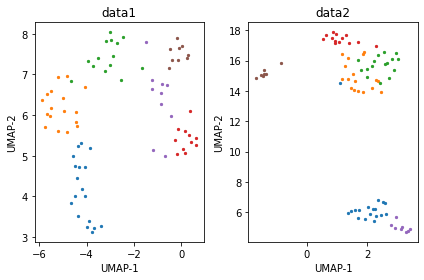

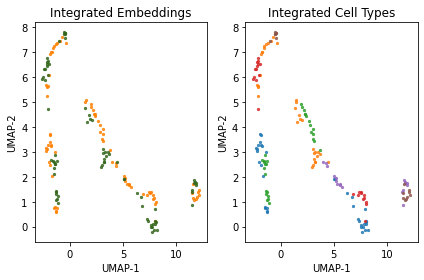

In [64]:
uc.Visualize([data1,data2], integrated_data, datatype=[labels_fn_red,labels_cc_red],mode='UMAP') # without datatype


In [68]:
uc.test_LabelTA(integrated_data,[labels_fn_red,labels_cc_red])

label transfer accuracy of data1:
0.0


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
#Importing libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
 
#Getting the data ready


#Linkage Matrix
def plot_dendro(data):
    Z = linkage(data, method = 'ward')
 
    #plotting dendrogram
    dendro = dendrogram(Z)
    plt.title('Dendrogram')
    plt.ylabel('Euclidean distance')
    plt.show()
plot_dendro(waves_inh_FN)   
plot_dendro(waves_exc_FN)   

plot_dendro(waves_inh_CC)   
plot_dendro(waves_exc_CC)   


In [ ]:
resolution_list = np.linspace(0,5,11)
modularity_dict = {}
n_clusts_dict = {}
#Louvain Clustering Parameters
RESOLUTION = 1.5
random_state = 42
full_data = df_waves_acsf['waveforms']
# BLUE COLOR
BlueCol = '\033[94m'
subsets=[100]
import random 
for res in resolution_list:
    print("\n" + BlueCol + str(res))
    for frac in subsets:
        rand_list = []
        n_clusts = []
        for i in list(range(1,25)):
            reducer_rand_test = umap.UMAP(n_neighbors = 20, 
                                     min_dist=0.0, 
                                     random_state=random.randint(1,100000))
            rand_data = np.vstack(np.random.permutation(full_data))
            mapper = reducer_rand_test.fit(rand_data)
            embedding_rand_test = reducer_rand_test.transform(rand_data)

            umap_df_rand_test = pd.DataFrame(embedding_rand_test, columns=('x', 'y'))
            louvain = Louvain(resolution=res,random_state=random_state)
            adjacency = mapper.graph_
            labels_exc = louvain.fit_predict(adjacency)
            clustering_solution = labels_exc
            modularity= get_modularity(adjacency,labels_exc)
            rand_list.append(modularity)
            n_clusts.append(len(set(clustering_solution)))
        modularity_dict.update({str(res): rand_list})
        n_clusts_dict.update({str(res): n_clusts})


resolution_list = np.linspace(0,5,11)

if 'n_clusts_dict' not in list(locals().keys()):
  n_clusts_dict = pkl.load(open('WaveMAP_Paper/data/n_clusts_dict.pkl','rb'))

if 'modularity_dict' not in list(locals().keys()):
  modularity_dict = pkl.load(open('WaveMAP_Paper/data/modularity_dict.pkl','rb'))

avg_n_clusts = []
for k in list(n_clusts_dict.keys()):
    avg_n_clusts.append(np.mean(n_clusts_dict[k]))
    
std_n_clusts = []
for k in list(n_clusts_dict.keys()):
    std_n_clusts.append(np.std(n_clusts_dict[k]))
    
std_modularity = []
for k in list(modularity_dict.keys()):
    std_modularity.append(np.std(modularity_dict[k]))
    
avg_modularity = []
for k in list(modularity_dict.keys()):
    avg_modularity.append(np.mean(modularity_dict[k]))

f, ax1 = plt.subplots(figsize=[3,2.5])

ax1.errorbar(resolution_list,avg_modularity,yerr=std_modularity,
             c = '#5c95ff', marker='o', fillstyle='full', markerfacecolor='w', 
             linewidth=1, markeredgewidth=1)
ax1.set_ylabel('Modularity Score')
ax1.set_xlabel('Resolution Parameter',fontsize=12)
ax1.set_xlim([0,8])
ax1.set_xticks([0,2,4,6,8])
ax1.yaxis.label.set_color('#5c95ff')
ax1.tick_params(axis='y',colors='#5c95ff')
ax1.set_ylim(0,1.0)
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
# ax1.set_yticklabels([0.0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0],fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_color('#f87575')
ax1.spines['left'].set_color('#5c95ff')

ax2 = ax1.twinx()
ax2.errorbar(resolution_list[1:],avg_n_clusts[1:],yerr=std_n_clusts[1:],
            c = '#f87575', marker='o', fillstyle='full', markerfacecolor='w', linewidth=1, markeredgewidth=1)
ax2.set_ylabel('Number of Clusters',fontsize=12,c='#f87575')
# ax2.spines['left'].set_color('b')
ax2.tick_params(axis='y',colors='#f87575')
ax2.set_ylim([0,18])
ax2.set_yticks([0,4,8,12,16]);
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_color('#f87575')
ax2.spines['left'].set_color('#5c95ff')

In [ ]:
# data_umap = exc_inh_df[features_ext_sub][exc_inh_df.ei_labels == 0]
data_umap = waves_all
cells,features = data_umap.shape
pca = PCA(n_components=features)
scaler = StandardScaler()
data_all = data_umap
data_all = scaler.fit_transform(data_all)
data_all = normalize(data_all)
pca.fit(data_all)
eigenvalues = pca.explained_variance_
sum(eigenvalues)**2/sum(eigenvalues**2)

In [ ]:
sns.histplot(exc_df_acsf['labels_lv']+1,discrete=True)
sns.histplot(exc_df_acsf['labels_lv']+1,discrete=True)


In [ ]:
plt.scatter(np.arange(len(eigenvalues)),eigenvalues)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
def get_confusion_matrix(data,feat):
    
    testSize = 0.3;
    RAND_STATE = 20
    UMAP_X = np.stack(data[feat].to_numpy().tolist(), axis=0)
    UMAP_y = data['labels_lv'].to_numpy()

    unclassified_ixs = [ix for ix,clust in enumerate(UMAP_y) if clust == -1]

    UMAP_X = np.delete(UMAP_X,unclassified_ixs,axis=0)
    UMAP_y = np.delete(UMAP_y,unclassified_ixs,axis=0)

    UMAP_X_train, UMAP_X_test, UMAP_y_train, UMAP_y_test = train_test_split(UMAP_X, UMAP_y, test_size=testSize, random_state=RAND_STATE)


    numCV = 5

    UMAP_model = xgb.XGBClassifier()
    UMAP_param_dist = {"max_depth": [4],
                "min_child_weight" : [2.5],
                "n_estimators": [100],
                "learning_rate": [0.3],
                "seed": [RAND_STATE]}
    UMAP_grid_search = GridSearchCV(UMAP_model, param_grid=UMAP_param_dist, 
                            cv = numCV, 
                            verbose=10, n_jobs=-1)
    UMAP_grid_search.fit(UMAP_X_train, UMAP_y_train)

    return  confusion_matrix(UMAP_y_test,UMAP_grid_search.predict(UMAP_X_test))


In [ ]:
def plot_confusion_matrix(conf_matrix,labels):
    confusion_mat_counts = conf_matrix
    N_CLUST = len(set(labels))
    conf_mat_row_list = []
    for row in confusion_mat_counts:
        row_sum = np.sum(row)
        
        row_percent = []
        
        for val in row:
            row_percent.append(val/row_sum)
        
        conf_mat_row_list.append(row_percent)

    conf_mat = np.array(conf_mat_row_list)

    colormap = mpl.cm.YlGnBu
    colormap.set_under('white')

    eps = np.spacing(0.0)
    f, arr = plt.subplots(1,figsize=[4,3])
    mappable = arr.imshow(conf_mat,cmap=colormap,vmin=eps,vmax=1.)
    color_bar = f.colorbar(mappable, ax=arr, extend='min')
    color_bar.set_label('P (Predicted | True)',fontsize=12,labelpad=15,fontname="Arial")
    color_bar.ax.tick_params(size=3,labelsize=12)

    #Specify label behavior of the main diagonal
    for i in range(0,N_CLUST):
        if int(conf_mat[i,i]*100) == 100:
            arr.text(i-0.38,i+0.17,int(round(conf_mat[i,i]*100)),fontsize=10,c='white',fontname="Arial")
        else:
            arr.text(i-0.34,i+0.16,int(round(conf_mat[i,i]*100)),fontsize=10,c='white',fontname="Arial")
            
    #Specify label behavior of the off-diagonals
    for i in range(0,N_CLUST):
        for j in range(0,N_CLUST):
            if conf_mat[i,j] < 0.1 and conf_mat[i,j] != 0:
                arr.text(j-0.2,i+0.15,int(round(conf_mat[i,j]*100)),fontsize=10,c='k',fontname="Arial")
            elif conf_mat[i,j] >= 0.1 and conf_mat[i,j] < 0.5 and conf_mat[i,j] != 0:
                arr.text(j-0.4, i+0.15,int(round(conf_mat[i,j]*100)),fontsize=10,c='k',fontname="Arial")

    arr.set_xticks(range(0,N_CLUST))
    arr.set_xticklabels(range(1,N_CLUST+1),fontsize=12);
    arr.set_yticks(range(0,N_CLUST))
    arr.set_yticklabels(range(1,N_CLUST+1),fontsize=12);
    arr.set_xlabel('Predicted Class',fontsize=12);
    arr.set_ylabel('True Class',fontsize=12);
    plt.tight_layout()

plot_confusion_matrix(get_confusion_matrix(inh_df_acsf,feat[:-1]),labels_inh)    

In [ ]:
exc_df_acsf['labels_lv'] = labels_exc

plot_confusion_matrix(get_confusion_matrix(exc_df_acsf,feat[:-1]),labels_exc)    

In [ ]:
resolution_list = np.linspace(0,5,11)
modularity_dict = {}
n_clusts_dict = {}
#Louvain Clustering Parameters
RESOLUTION = 1.5
random_state = 42
full_data = join_wave_with_ephys(feat, exc_inh_df_w_waves_acsf[exc_inh_df_w_waves_acsf['ephys_labels']==0])
# BLUE COLOR
BlueCol = '\033[94m'
subsets=[100]
import random 
for res in resolution_list:
    print("\n" + BlueCol + str(res))
    for frac in subsets:
        rand_list = []
        n_clusts = []
        for i in list(range(1,25)):
            reducer_rand_test = umap.UMAP(n_neighbors = 20, 
                                     min_dist=0.0, 
                                     random_state=random.randint(1,100000))
            rand_data = np.random.permutation(full_data)[0:(int(len(full_data)*frac)),:]
            mapper = reducer_rand_test.fit(rand_data)
            embedding_rand_test = reducer_rand_test.transform(rand_data)

            umap_df_rand_test = pd.DataFrame(embedding_rand_test, columns=('x', 'y'))
            louvain = Louvain(resolution=res,random_state=random_state)
            adjacency = mapper.graph_
            labels_exc = louvain.fit_predict(adjacency)
            clustering_solution = labels_exc
            modularity= get_modularity(adjacency,labels_exc)
            rand_list.append(modularity)
            n_clusts.append(len(set(clustering_solution)))
        modularity_dict.update({str(res): rand_list})
        n_clusts_dict.update({str(res): n_clusts})


resolution_list = np.linspace(0,5,11)

if 'n_clusts_dict' not in list(locals().keys()):
  n_clusts_dict = pkl.load(open('WaveMAP_Paper/data/n_clusts_dict.pkl','rb'))

if 'modularity_dict' not in list(locals().keys()):
  modularity_dict = pkl.load(open('WaveMAP_Paper/data/modularity_dict.pkl','rb'))

avg_n_clusts = []
for k in list(n_clusts_dict.keys()):
    avg_n_clusts.append(np.mean(n_clusts_dict[k]))
    
std_n_clusts = []
for k in list(n_clusts_dict.keys()):
    std_n_clusts.append(np.std(n_clusts_dict[k]))
    
std_modularity = []
for k in list(modularity_dict.keys()):
    std_modularity.append(np.std(modularity_dict[k]))
    
avg_modularity = []
for k in list(modularity_dict.keys()):
    avg_modularity.append(np.mean(modularity_dict[k]))

f, ax1 = plt.subplots(figsize=[3,2.5])

ax1.errorbar(resolution_list,avg_modularity,yerr=std_modularity,
             c = '#5c95ff', marker='o', fillstyle='full', markerfacecolor='w', 
             linewidth=1, markeredgewidth=1)
ax1.set_ylabel('Modularity Score')
ax1.set_xlabel('Resolution Parameter',fontsize=12)
ax1.set_xlim([0,8])
ax1.set_xticks([0,2,4,6,8])
ax1.yaxis.label.set_color('#5c95ff')
ax1.tick_params(axis='y',colors='#5c95ff')
ax1.set_ylim(0,1.0)
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
# ax1.set_yticklabels([0.0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0],fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_color('#f87575')
ax1.spines['left'].set_color('#5c95ff')

ax2 = ax1.twinx()
ax2.errorbar(resolution_list[1:],avg_n_clusts[1:],yerr=std_n_clusts[1:],
            c = '#f87575', marker='o', fillstyle='full', markerfacecolor='w', linewidth=1, markeredgewidth=1)
ax2.set_ylabel('Number of Clusters',fontsize=12,c='#f87575')
# ax2.spines['left'].set_color('b')
ax2.tick_params(axis='y',colors='#f87575')
ax2.set_ylim([0,18])
ax2.set_yticks([0,4,8,12,16]);
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_color('#f87575')
ax2.spines['left'].set_color('#5c95ff')

In [ ]:
testSize = 0.3;

UMAP_X = np.stack(umap_df['waveform'].to_numpy().tolist(), axis=0)
UMAP_y = umap_df['color'].to_numpy()

unclassified_ixs = [ix for ix,clust in enumerate(UMAP_y) if clust == -1]

UMAP_X = np.delete(UMAP_X,unclassified_ixs,axis=0)
UMAP_y = np.delete(UMAP_y,unclassified_ixs,axis=0)

UMAP_X_train, UMAP_X_test, UMAP_y_train, UMAP_y_test = train_test_split(UMAP_X, UMAP_y, test_size=testSize, random_state=RAND)



In [ ]:
resolution_list = np.linspace(0,5,11)
modularity_dict = {}
n_clusts_dict = {}
#Louvain Clustering Parameters
RESOLUTION = 1.5
random_state = 42
full_data = join_wave_with_ephys(feat, exc_inh_df_w_waves_acsf[exc_inh_df_w_waves_acsf['ephys_labels']==1])
# BLUE COLOR
BlueCol = '\033[94m'
subsets=[100]
import random 
for res in resolution_list:
    print("\n" + BlueCol + str(res))
    for frac in subsets:
        rand_list = []
        n_clusts = []
        for i in list(range(1,25)):
            reducer_rand_test = umap.UMAP(n_neighbors = 20, 
                                     min_dist=0.0, 
                                     random_state=random.randint(1,100000))
            rand_data = np.random.permutation(full_data)[0:(int(len(full_data)*frac)),:]
            mapper = reducer_rand_test.fit(rand_data)
            embedding_rand_test = reducer_rand_test.transform(rand_data)

            umap_df_rand_test = pd.DataFrame(embedding_rand_test, columns=('x', 'y'))
            louvain = Louvain(resolution=res,random_state=random_state)
            adjacency = mapper.graph_
            labels_exc = louvain.fit_predict(adjacency)
            clustering_solution = labels_exc
            modularity= get_modularity(adjacency,labels_exc)
            rand_list.append(modularity)
            n_clusts.append(len(set(clustering_solution)))
        modularity_dict.update({str(res): rand_list})
        n_clusts_dict.update({str(res): n_clusts})


resolution_list = np.linspace(0,5,11)

if 'n_clusts_dict' not in list(locals().keys()):
  n_clusts_dict = pkl.load(open('WaveMAP_Paper/data/n_clusts_dict.pkl','rb'))

if 'modularity_dict' not in list(locals().keys()):
  modularity_dict = pkl.load(open('WaveMAP_Paper/data/modularity_dict.pkl','rb'))

avg_n_clusts = []
for k in list(n_clusts_dict.keys()):
    avg_n_clusts.append(np.mean(n_clusts_dict[k]))
    
std_n_clusts = []
for k in list(n_clusts_dict.keys()):
    std_n_clusts.append(np.std(n_clusts_dict[k]))
    
std_modularity = []
for k in list(modularity_dict.keys()):
    std_modularity.append(np.std(modularity_dict[k]))
    
avg_modularity = []
for k in list(modularity_dict.keys()):
    avg_modularity.append(np.mean(modularity_dict[k]))



In [ ]:
f, ax1 = plt.subplots(figsize=[3,2.5])

ax1.errorbar(resolution_list,avg_modularity,yerr=std_modularity,
             c = '#5c95ff', marker='o', fillstyle='full', markerfacecolor='w', 
             linewidth=1, markeredgewidth=1)
ax1.set_ylabel('Modularity Score')
ax1.set_xlabel('Resolution Parameter',fontsize=12)
ax1.set_xlim([0,8])
ax1.set_xticks([0,1,2,4,6,8])
ax1.yaxis.label.set_color('#5c95ff')
ax1.tick_params(axis='y',colors='#5c95ff')
ax1.set_ylim(0,1.0)
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
# ax1.set_yticklabels([0.0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0],fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_color('#f87575')
ax1.spines['left'].set_color('#5c95ff')

ax2 = ax1.twinx()
ax2.errorbar(resolution_list[1:],avg_n_clusts[1:],yerr=std_n_clusts[1:],
            c = '#f87575', marker='o', fillstyle='full', markerfacecolor='w', linewidth=1, markeredgewidth=1)
ax2.set_ylabel('Number of Clusters',fontsize=12,c='#f87575')
# ax2.spines['left'].set_color('b')
ax2.tick_params(axis='y',colors='#f87575')
ax2.set_ylim([0,18])
ax2.set_yticks([0,4,8,12,16]);
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_color('#f87575')
ax2.spines['left'].set_color('#5c95ff')

In [ ]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(inh_df_acsf[['AP_avg','resistance','ap_width','thr','isi', 'sub_thr', 'imp','labels_lv']],hue='labels_lv',palette=CUSTOM_PAL_SORT_3[:len(set(inh_df_acsf['labels_lv']))])


In [ ]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(exc_df_acsf[['AP_avg','resistance','ap_width','thr','isi', 'sub_thr', 'imp','labels_lv']],hue='labels_lv',palette=CUSTOM_PAL_SORT_3[:len(set(exc_df_acsf['labels_lv']))])


In [ ]:
from scipy.stats import mannwhitneyu

def get_pvalues(data,var,hue):
    df = data
    x = hue
    y = var

    pairs = np.unique(data[hue])
    pairs = [i for i in combinations(pairs,2)]
    test_short_name = 'Mann-Whitney'
    pvalues = []
    sigs = []
    for pair in pairs:
        data1 = df.groupby(x)[y].get_group(pair[0])
        data2 = df.groupby(x)[y].get_group(pair[1])
        stat, p = mannwhitneyu(data1, data2)
        pvalues.append(p)

        if  p > 5.00e-02 and p <= 1.00e+00:
            sigs.append(0)
        elif 1.00e-02 < p and p <= 5.00e-02:
            sigs.append(1)
        elif 1.00e-03 < p and p<= 1.00e-02:
            sigs.append(2)
        elif 1.00e-04 < p and p<= 1.00e-03:
            sigs.append(3)   
        elif  p <= 1.00e-04:
            sigs.append(4)   

    sig_matrix = np.zeros((len(set(data.labels_lv)),len(set(data.labels_lv))))
    for i,j in enumerate(pairs):
        sig_matrix[j] = sigs[i]
    sig_matrix = sig_matrix+sig_matrix.T     
    return sig_matrix# pvalues,pairs,sigs


In [ ]:
from itertools import combinations
from statannotations.Annotator import Annotator
def plot_significance_new(data,var,hue,ax,palette='mako',drug=False,test ='Mann-Whitney'):


    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    boxes = sns.violinplot(data=data,
                            x=hue,
                            y=var,
                            width=.6, 
                            palette=palette,
                            ax=ax)

    # sns.stripplot(x=hue, y=var , data=data,           
    #             size=3, color=".4", linewidth=0,ax=ax) 
    ax.set_xlabel('class',fontdict={'fontsize':20})
    ax.set_ylabel(var,fontdict={'fontsize':20})

    for box,col in zip(boxes.patches,['blue','crimson','teal']):
        mybox1 = box

        # Change the appearance of that box
        if drug:
            mybox1.set_facecolor('white')
            mybox1.set_edgecolor(col)
        else:
            mybox1.set_facecolor(col)
            mybox1.set_edgecolor('black')

        mybox1.set_linewidth(3)

    pairs = np.unique(data[hue])
    pairs = [i for i in combinations(pairs,2)]

    annotator = Annotator(ax,pairs, data=data, x=hue,palette=palette, y=var)
    annotator.configure(test=test, text_format='star', loc='inside')
    annotator.apply_and_annotate()  
    plt.show()

for val in ['AP_avg','ap_width', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']:

    fig,ax = plt.subplots(1,1,figsize=[10,10])

    plot_significance_new(data = inh_df_acsf,
    var = val,
    hue = 'labels_lv',
    ax = ax,
    drug = False,
    palette = CUSTOM_PAL_SORT_3[:len(set(exc_df_acsf['labels_lv']))] )
    # plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/'+val+'_'+cond+'_dist.png',dpi=200)


In [ ]:
sig_all_inh = []
for val in ['AP_avg','ap_width', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']:    
    sig_matrix = get_pvalues(inh_df_acsf,var = val,hue = 'labels_lv',)
    sig_all_inh.append(sig_matrix)
    fig,ax = plt.subplots(1,1,figsize=[4,4])
    sns.heatmap(sig_matrix,annot=True,ax=ax)
    ax.set_title(val+' significance')
    plt.show()

In [ ]:
a_inh = np.zeros_like(sig_all_inh[0])
for i in np.arange(len(sig_all_inh)):
    a_inh += sig_all_inh[i]
sns.heatmap(a_inh)

In [ ]:
from itertools import combinations
from statannotations.Annotator import Annotator

def plot_significance_new(data,var,hue,ax,palette='mako',drug=False,test ='Mann-Whitney'):
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    boxes = sns.violinplot(data=data,
                x=hue,
                y=var,
                width=.6, 
                palette=palette,
                ax=ax)
                          
    # sns.stripplot(x=hue, y=var , data=data,
    #             size=3, color=".4", linewidth=0,ax=ax)
    ax.set_xlabel('class',fontdict={'fontsize':20})
    ax.set_ylabel(var,fontdict={'fontsize':20})

    for box,col in zip(boxes.patches,['blue','crimson','teal']):
        mybox1 = box

        # Change the appearance of that box
        if drug:
            mybox1.set_facecolor('white')
            mybox1.set_edgecolor(col)
        else:
            mybox1.set_facecolor(col)
            mybox1.set_edgecolor('black')

        mybox1.set_linewidth(3)

    pairs = np.unique(data[hue])
    pairs = [i for i in combinations(pairs,2)]


    annotator = Annotator(ax,pairs, data=data, x=hue,palette=palette, y=var)
    annotator.configure(test=test, text_format='star', loc='inside')
    annotator.apply_and_annotate()  

for val in ['AP_avg', 'ap_width','resistance','mi', 'thr', 'isi', 'sub_thr','imp']:
    fig,ax = plt.subplots(1,1,figsize=[10,10])
    plot_significance_new(data = exc_df_acsf,
    var = val,
    hue = 'labels_lv',
    ax = ax,
    drug = False,
    palette = CUSTOM_PAL_SORT_3[:len(set(exc_df_acsf['labels_lv']))])
    # plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/'+val+'_'+cond+'_dist.png',dpi=200)


In [ ]:
sig_all_exc = []
for val in ['AP_avg','ap_width', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']:    
    sig_matrix = get_pvalues(exc_df_acsf,var = val,hue = 'labels_lv',)
    sig_all_exc.append(sig_matrix)
    fig,ax = plt.subplots(1,1,figsize=[4,4])
    sns.heatmap(sig_matrix,annot=True,ax=ax)
    ax.set_title(val+' significance')
    plt.show()

In [ ]:
a_exc = np.zeros_like(sig_all[0])
for i in np.arange(len(sig_all)):
    a_exc += sig_all_exc[i]
sns.heatmap(a_exc)